In [2]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [3]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [4]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [5]:

# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [17]:

# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.3240024   0.15434452 -0.25686648]
 [ 0.15434452  0.47916901  0.05860664]
 [-0.25686648  0.05860664  0.66167363]]


In [28]:

# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print(eigen_values)
print("Eigen Vectors:\n",eigen_vectors)

[1.42916885 0.39944084 0.63623535]
Eigen Vectors:
 [[-0.9427458  -0.26768973  0.19892854]
 [-0.13433401  0.8507233   0.50815769]
 [ 0.30526174 -0.45234066  0.83797565]]


Populating the interactive namespace from numpy and matplotlib


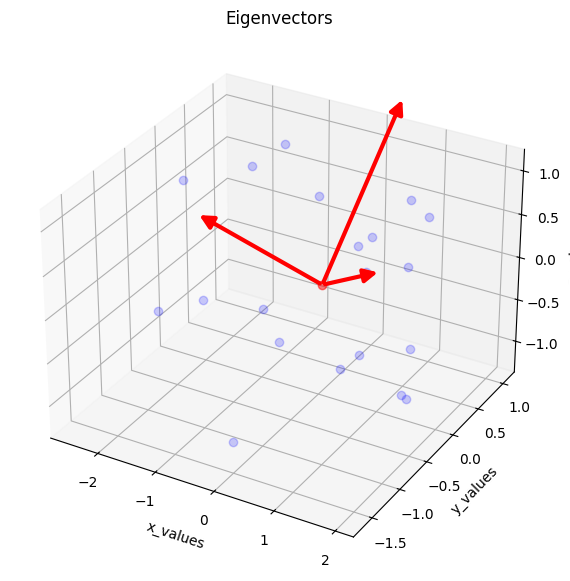

In [29]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
import numpy as np
import pandas as pd


# Fixed Arrow3D
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        from mpl_toolkits.mplot3d import proj3d
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

mean_vals = [df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()]

# Scatter
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', color='blue', alpha=0.2)

# Mean
ax.plot([mean_vals[0]], [mean_vals[1]], [mean_vals[2]], 'o', color='red', alpha=0.5)

# Eigenvectors
eigenvector_scale = 2.0
for v in eigen_vectors.T:
    a = Arrow3D([mean_vals[0], mean_vals[0] + v[0]*eigenvector_scale],
                [mean_vals[1], mean_vals[1] + v[1]*eigenvector_scale],
                [mean_vals[2], mean_vals[2] + v[2]*eigenvector_scale],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.show()


In [30]:
pc = eigen_vectors[0:2]
pc

array([[-0.9427458 , -0.26768973,  0.19892854],
       [-0.13433401,  0.8507233 ,  0.50815769]])